In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('combined_data.csv')

In [3]:
df.head()

,Unnamed: 0,bitcoin_price,bitcoin_volume,bitcoin_market_cap,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,description_sentiment,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
0,2023-10-11,27392.247703,1.015172e+10,5.352004e+11,0.002601,0.477486,9.000000,4.0,-0.847598,-0.999320,...,-0.130271,-0.129153,-0.128358,-0.202981,-0.202289,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
1,2023-10-12,26842.190439,1.460844e+10,5.236564e+11,-0.020081,0.477486,13.500000,8.0,-0.989922,-0.989922,...,-0.130271,-0.129153,-0.128358,-0.999320,-0.202289,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
2,2023-10-13,26729.137206,1.086764e+10,5.216077e+11,-0.004212,0.477486,21.000000,5.0,0.027463,0.007927,...,-0.130271,-0.129153,-0.128358,-0.989922,-0.999320,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
3,2023-10-14,26841.136221,1.434441e+10,5.236556e+11,0.004190,0.477486,13.169026,9.0,0.997904,0.997183,...,-0.130271,-0.129153,-0.128358,0.007927,-0.989922,-0.999320,-0.200894,-0.199971,-0.198852,-0.198002
4,2023-10-15,26863.183569,5.543161e+09,5.239792e+11,0.000821,0.477486,19.000000,6.0,-0.898067,-0.898067,...,-0.130271,-0.129153,-0.128358,0.997183,0.007927,-0.989922,-0.999320,-0.199971,-0.198852,-0.198002


In [4]:
df=df.rename(columns={'Unnamed: 0':'timestamp'})

In [5]:
df.head()

,timestamp,bitcoin_price,bitcoin_volume,bitcoin_market_cap,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,description_sentiment,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
0,2023-10-11,27392.247703,1.015172e+10,5.352004e+11,0.002601,0.477486,9.000000,4.0,-0.847598,-0.999320,...,-0.130271,-0.129153,-0.128358,-0.202981,-0.202289,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
1,2023-10-12,26842.190439,1.460844e+10,5.236564e+11,-0.020081,0.477486,13.500000,8.0,-0.989922,-0.989922,...,-0.130271,-0.129153,-0.128358,-0.999320,-0.202289,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
2,2023-10-13,26729.137206,1.086764e+10,5.216077e+11,-0.004212,0.477486,21.000000,5.0,0.027463,0.007927,...,-0.130271,-0.129153,-0.128358,-0.989922,-0.999320,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
3,2023-10-14,26841.136221,1.434441e+10,5.236556e+11,0.004190,0.477486,13.169026,9.0,0.997904,0.997183,...,-0.130271,-0.129153,-0.128358,0.007927,-0.989922,-0.999320,-0.200894,-0.199971,-0.198852,-0.198002
4,2023-10-15,26863.183569,5.543161e+09,5.239792e+11,0.000821,0.477486,19.000000,6.0,-0.898067,-0.898067,...,-0.130271,-0.129153,-0.128358,0.997183,0.007927,-0.989922,-0.999320,-0.199971,-0.198852,-0.198002


In [6]:
df.set_index('timestamp', inplace=True)

In [7]:
df.head()

,bitcoin_price,bitcoin_volume,bitcoin_market_cap,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,description_sentiment,score_lag1,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-11,27392.247703,1.015172e+10,5.352004e+11,0.002601,0.477486,9.000000,4.0,-0.847598,-0.999320,13.142606,...,-0.130271,-0.129153,-0.128358,-0.202981,-0.202289,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
2023-10-12,26842.190439,1.460844e+10,5.236564e+11,-0.020081,0.477486,13.500000,8.0,-0.989922,-0.989922,9.000000,...,-0.130271,-0.129153,-0.128358,-0.999320,-0.202289,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
2023-10-13,26729.137206,1.086764e+10,5.216077e+11,-0.004212,0.477486,21.000000,5.0,0.027463,0.007927,13.500000,...,-0.130271,-0.129153,-0.128358,-0.989922,-0.999320,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
2023-10-14,26841.136221,1.434441e+10,5.236556e+11,0.004190,0.477486,13.169026,9.0,0.997904,0.997183,21.000000,...,-0.130271,-0.129153,-0.128358,0.007927,-0.989922,-0.999320,-0.200894,-0.199971,-0.198852,-0.198002
2023-10-15,26863.183569,5.543161e+09,5.239792e+11,0.000821,0.477486,19.000000,6.0,-0.898067,-0.898067,13.169026,...,-0.130271,-0.129153,-0.128358,0.997183,0.007927,-0.989922,-0.999320,-0.199971,-0.198852,-0.198002


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2023-10-11 to 2024-10-09
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bitcoin_price               366 non-null    float64
 1   bitcoin_volume              366 non-null    float64
 2   bitcoin_market_cap          366 non-null    float64
 3   bitcoin_returns             366 non-null    float64
 4   bitcoin_volatility          366 non-null    float64
 5   score                       366 non-null    float64
 6   No_Comments                 366 non-null    float64
 7   title_sentiment             366 non-null    float64
 8   description_sentiment       366 non-null    float64
 9   score_lag1                  366 non-null    float64
 10  score_lag2                  366 non-null    float64
 11  score_lag3                  366 non-null    float64
 12  score_lag4                  366 non-null    float64
 13  score_lag5              

In [9]:
df.describe()

,bitcoin_price,bitcoin_volume,bitcoin_market_cap,bitcoin_returns,bitcoin_volatility,score,No_Comments,title_sentiment,description_sentiment,score_lag1,...,title_sentiment_lag5,title_sentiment_lag6,title_sentiment_lag7,description_sentiment_lag1,description_sentiment_lag2,description_sentiment_lag3,description_sentiment_lag4,description_sentiment_lag5,description_sentiment_lag6,description_sentiment_lag7
count,366.000000,3.660000e+02,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,54961.941728,2.805516e+10,1.081251e+12,0.002601,0.477486,13.169026,146.625683,-0.133779,-0.203670,13.142606,...,-0.130271,-0.129153,-0.128358,-0.202981,-0.202289,-0.201329,-0.200894,-0.199971,-0.198852,-0.198002
std,12414.285636,1.488757e+10,2.469168e+11,0.026979,0.206254,26.040903,618.469764,0.674253,0.706811,26.035997,...,0.673566,0.673236,0.673070,0.706688,0.706564,0.706328,0.706280,0.706064,0.705749,0.705567
min,26729.137206,5.543161e+09,5.216077e+11,-0.082359,0.142237,0.000000,0.000000,-0.999571,-0.999392,0.000000,...,-0.999571,-0.999571,-0.999571,-0.999392,-0.999392,-0.999392,-0.999392,-0.999392,-0.999392,-0.999392
25%,43015.939358,1.767016e+10,8.431477e+11,-0.010571,0.340585,4.000000,3.000000,-0.640574,-0.792705,4.000000,...,-0.640574,-0.640574,-0.640574,-0.792705,-0.792705,-0.792705,-0.792705,-0.792705,-0.792705,-0.792705
50%,59478.676257,2.529479e+10,1.174667e+12,0.001686,0.442419,8.000000,9.000000,-0.317278,-0.419337,8.000000,...,-0.310485,-0.303920,-0.301784,-0.417044,-0.413868,-0.409280,-0.409280,-0.405443,-0.400851,-0.395010
75%,65066.091298,3.591801e+10,1.281663e+12,0.014125,0.579420,13.169026,23.000000,0.284133,0.219476,13.169026,...,0.284133,0.284133,0.284133,0.219476,0.219476,0.219476,0.219476,0.219476,0.219476,0.219476
max,73097.767027,1.202460e+11,1.436631e+12,0.122669,1.283608,307.153846,6542.000000,0.997904,0.997183,307.153846,...,0.997904,0.997904,0.997904,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183,0.997183


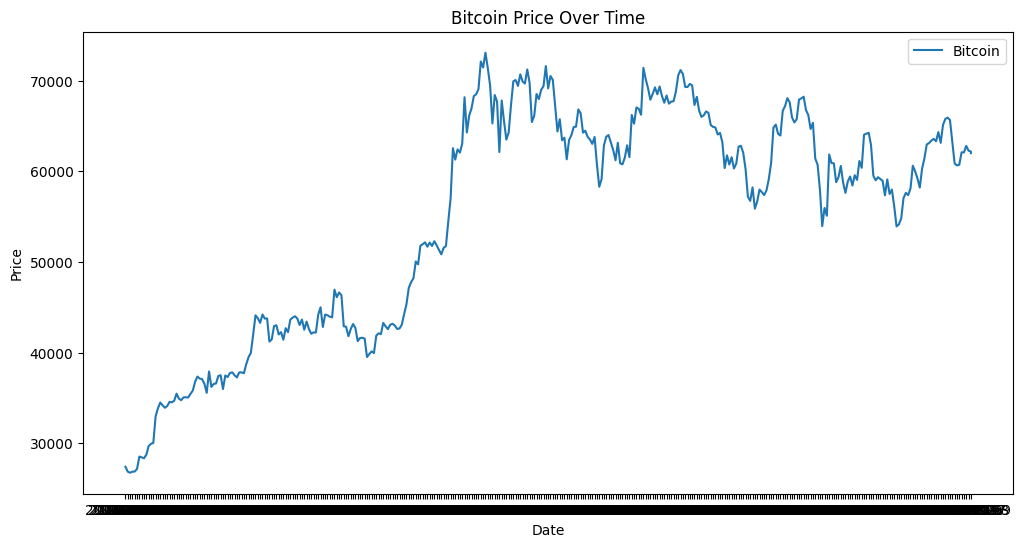

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bitcoin_price'], label='Bitcoin')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


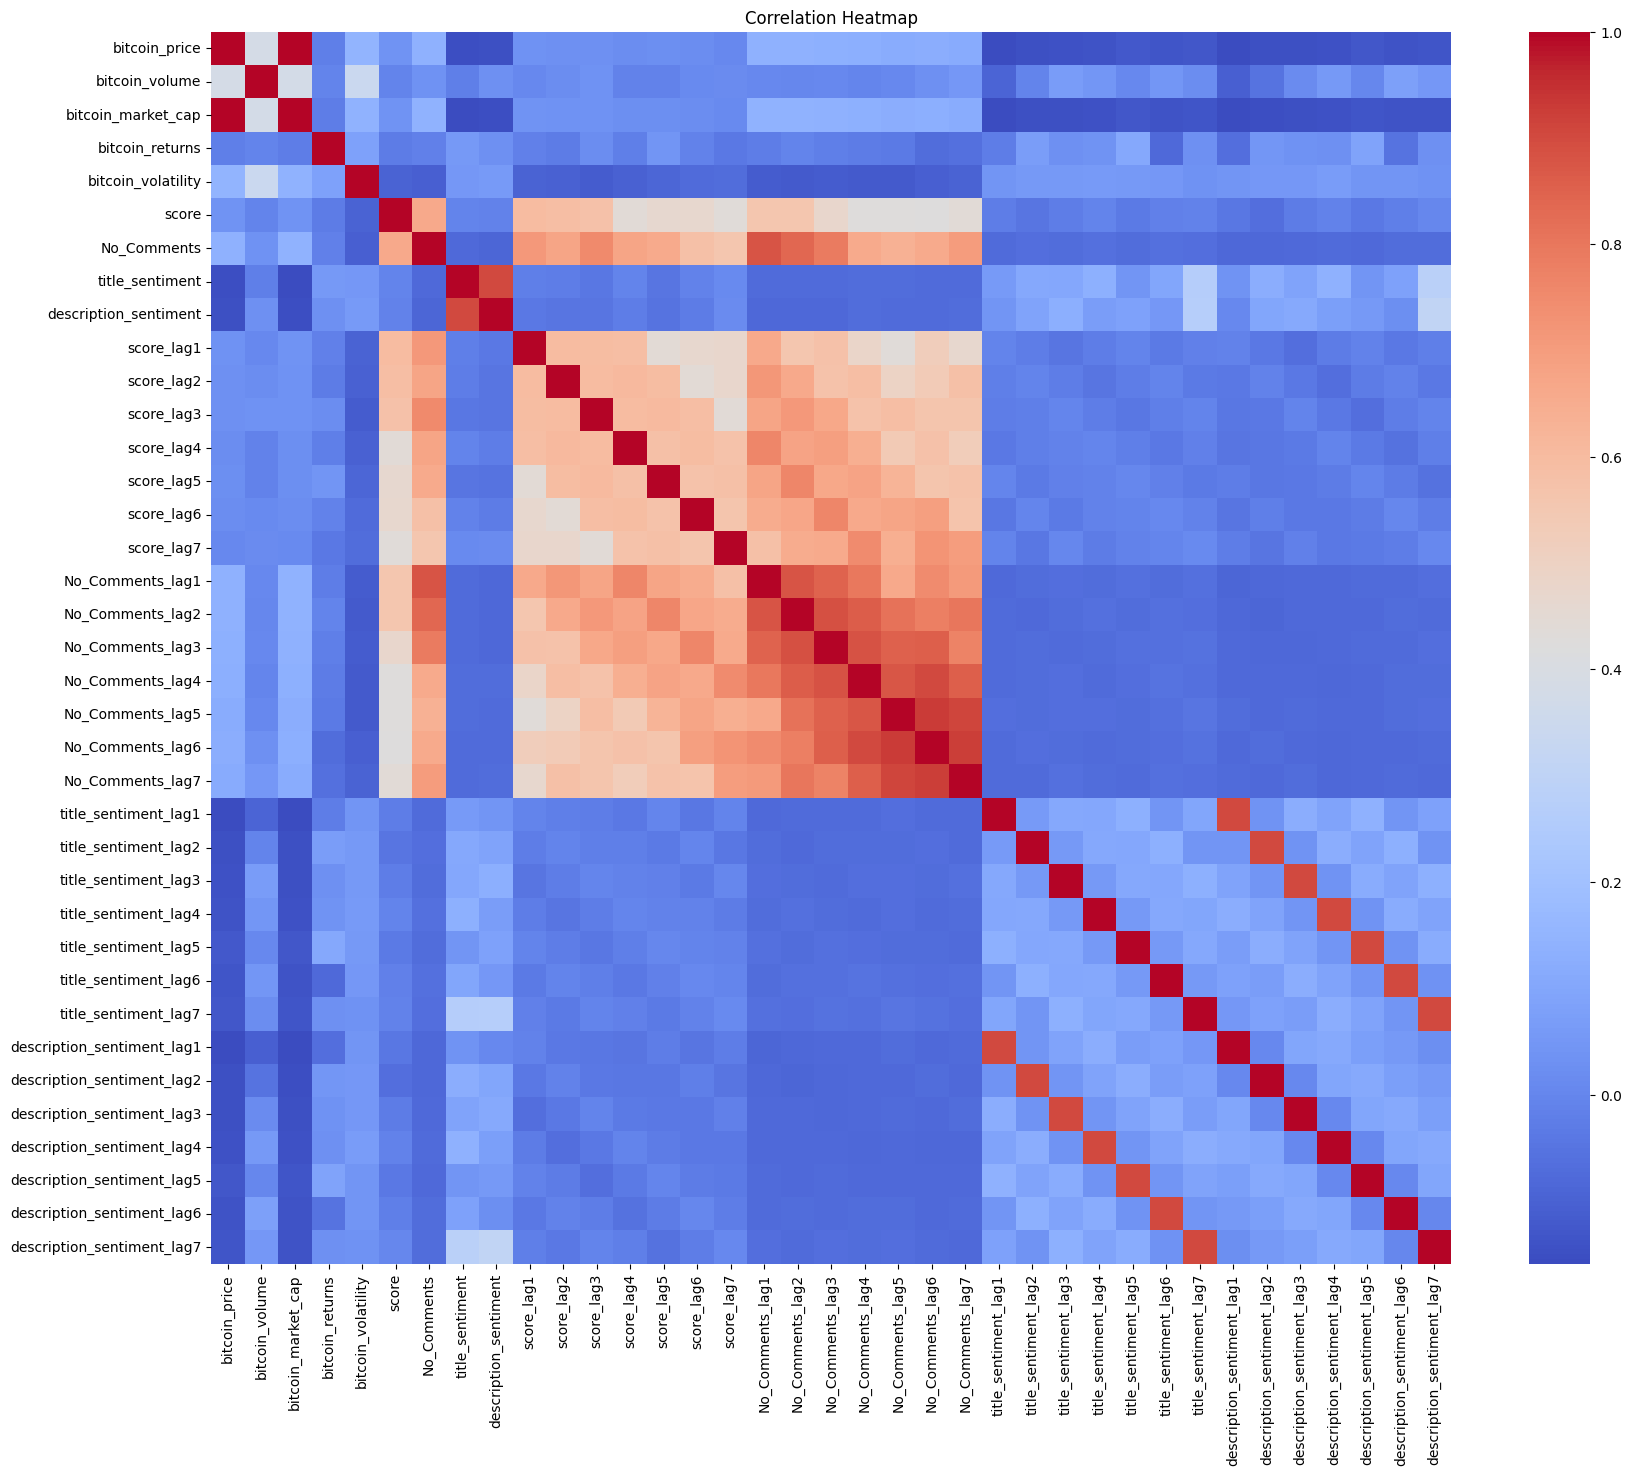

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

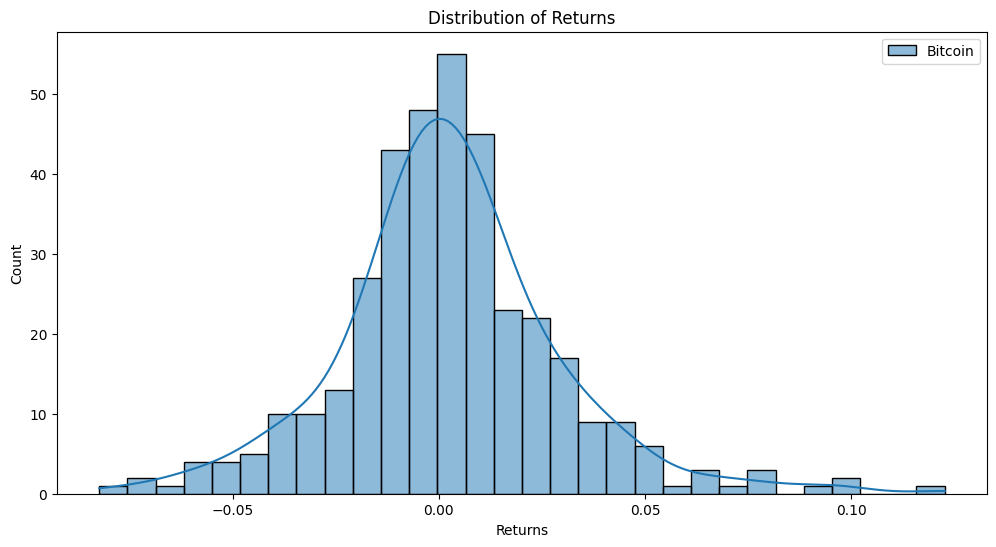

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bitcoin_returns'], kde=True, label='Bitcoin')
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.legend()
plt.show()


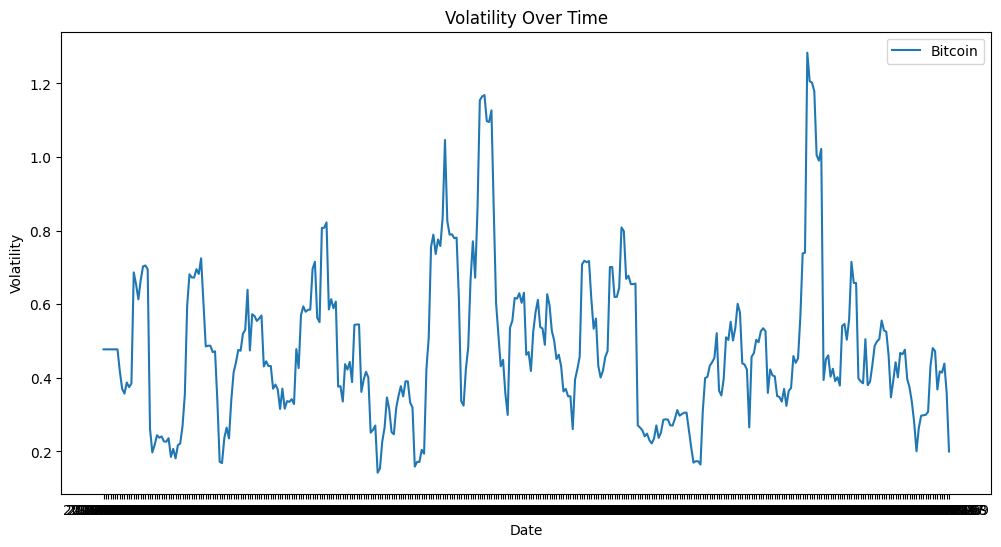

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bitcoin_volatility'], label='Bitcoin')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


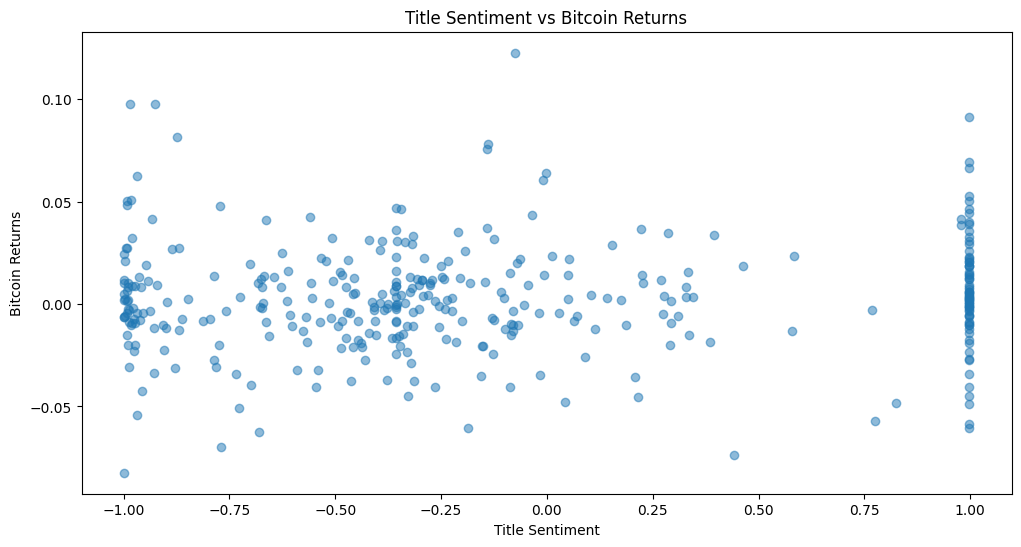

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(df['title_sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('Title Sentiment vs Bitcoin Returns')
plt.xlabel('Title Sentiment')
plt.ylabel('Bitcoin Returns')
plt.show()


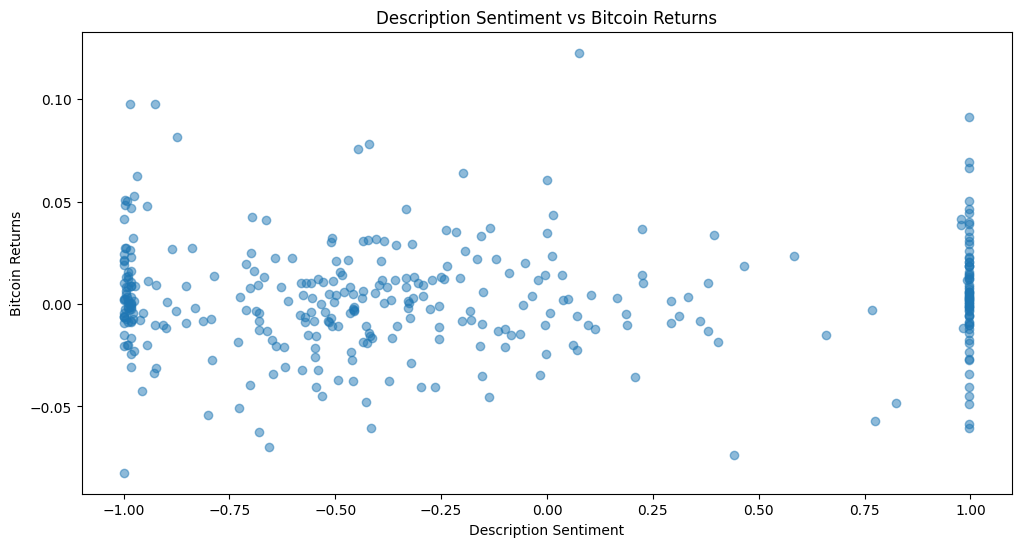

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(df['description_sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('Description Sentiment vs Bitcoin Returns')
plt.xlabel('Description Sentiment')
plt.ylabel('Bitcoin Returns')
plt.show()


In [16]:
df['sentiment']=(df['title_sentiment']+df['description_sentiment'])/2

In [17]:
df['sentiment']

timestamp
2023-10-11   -0.923459
2023-10-12   -0.989922
2023-10-13    0.017695
2023-10-14    0.997544
2023-10-15   -0.898067
                ...   
2024-10-06   -0.455111
2024-10-07   -0.327449
2024-10-08   -0.498082
2024-10-09   -0.431941
2024-10-09   -0.431941
Name: sentiment, Length: 366, dtype: float64

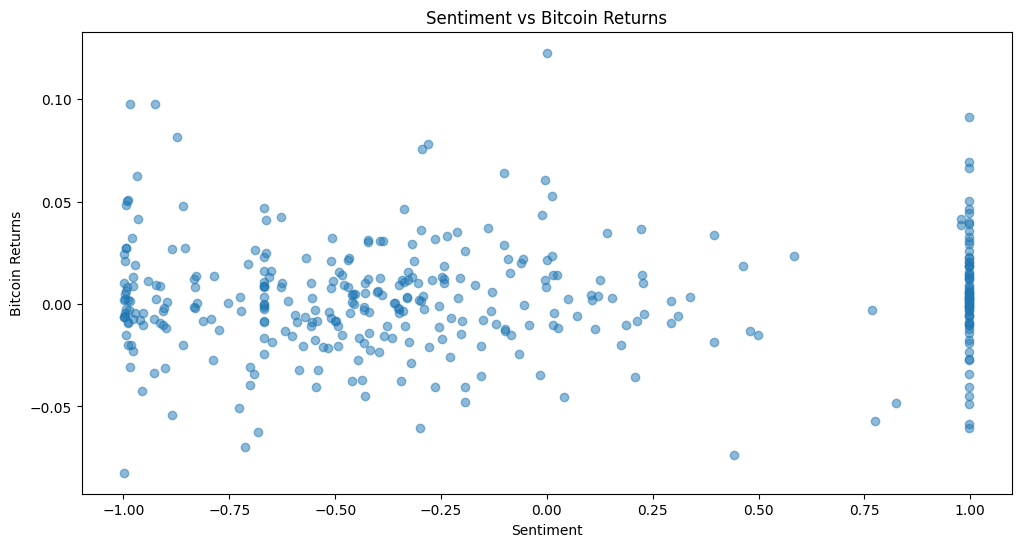

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('Sentiment vs Bitcoin Returns')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Returns')
plt.show()


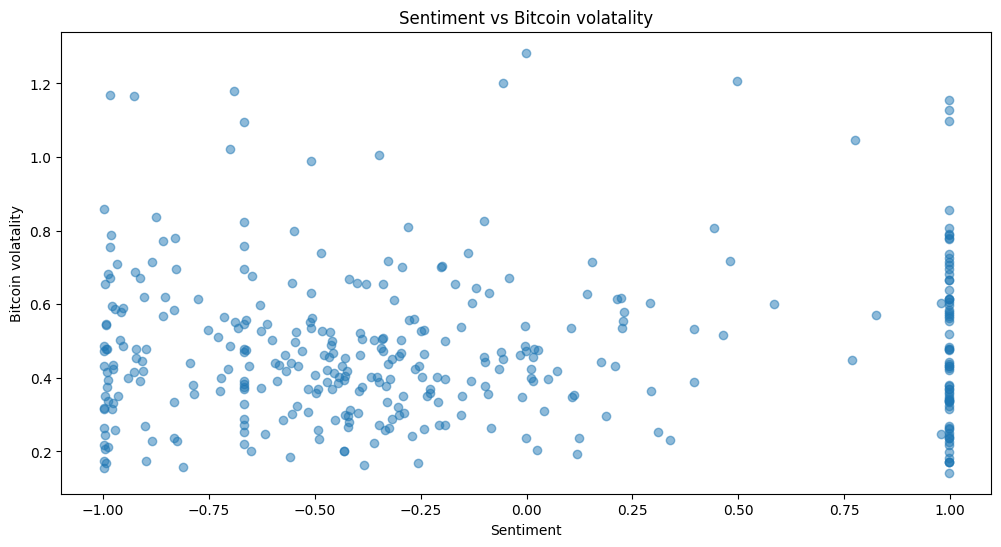

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sentiment'], df['bitcoin_volatility'], alpha=0.5)
plt.title('Sentiment vs Bitcoin volatality')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin volatality')
plt.show()

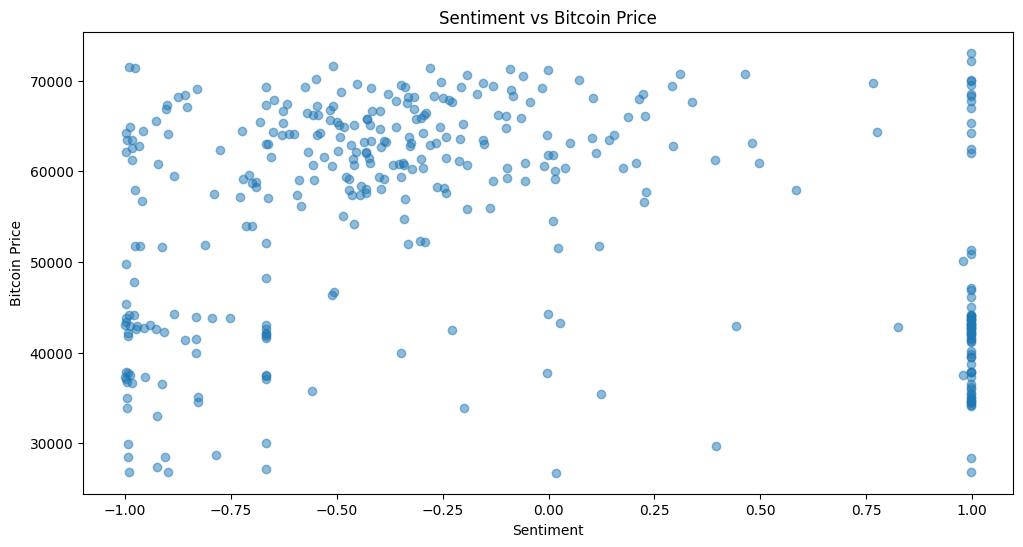

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sentiment'], df['bitcoin_price'], alpha=0.5)
plt.title('Sentiment vs Bitcoin Price')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Price')
plt.show()

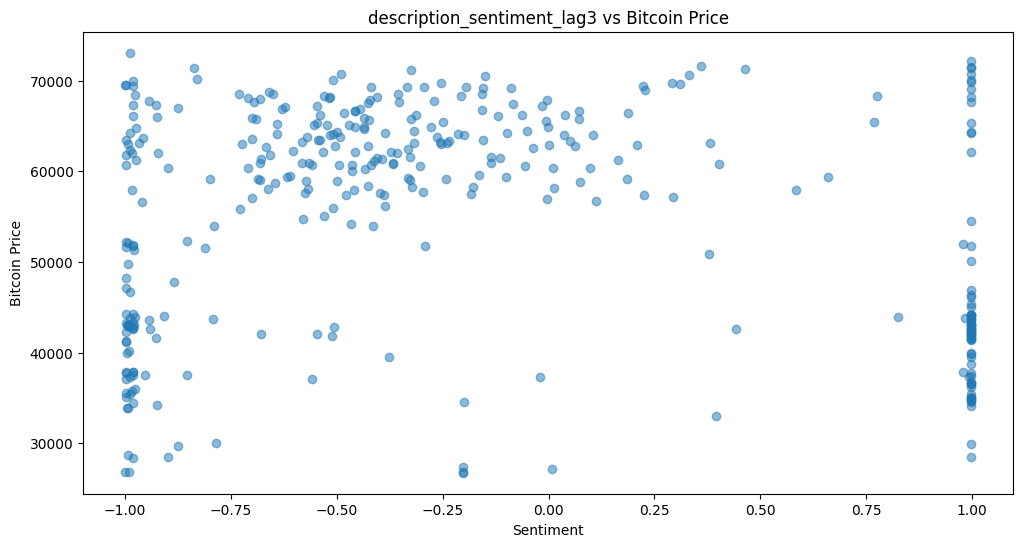

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(df['description_sentiment_lag3'], df['bitcoin_price'], alpha=0.5)
plt.title('description_sentiment_lag3 vs Bitcoin Price')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Price')
plt.show()

Text(0, 0.5, 'Bitcoin Price')

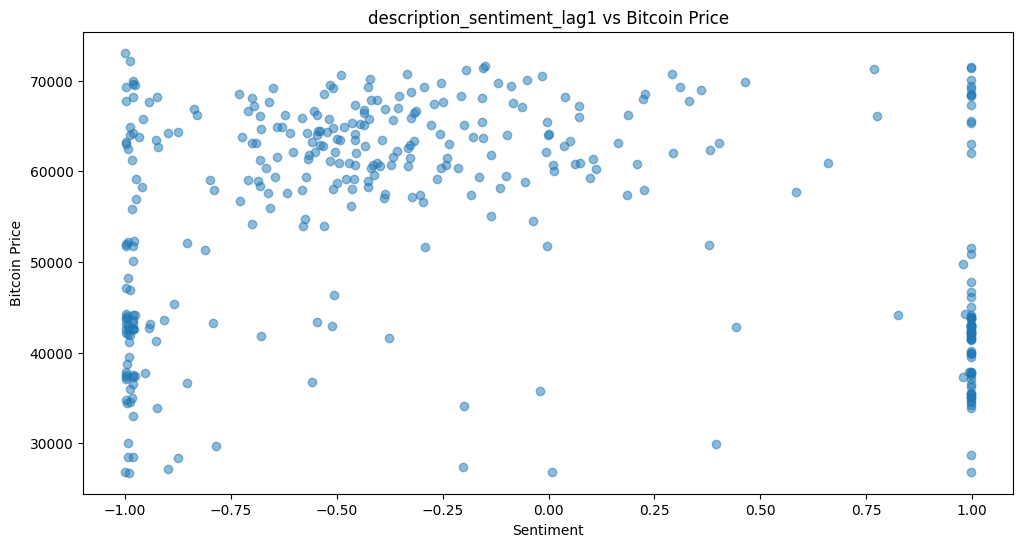

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(df['description_sentiment_lag1'], df['bitcoin_price'], alpha=0.5)
plt.title('description_sentiment_lag1 vs Bitcoin Price')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Price')

Text(0, 0.5, 'Bitcoin Price')

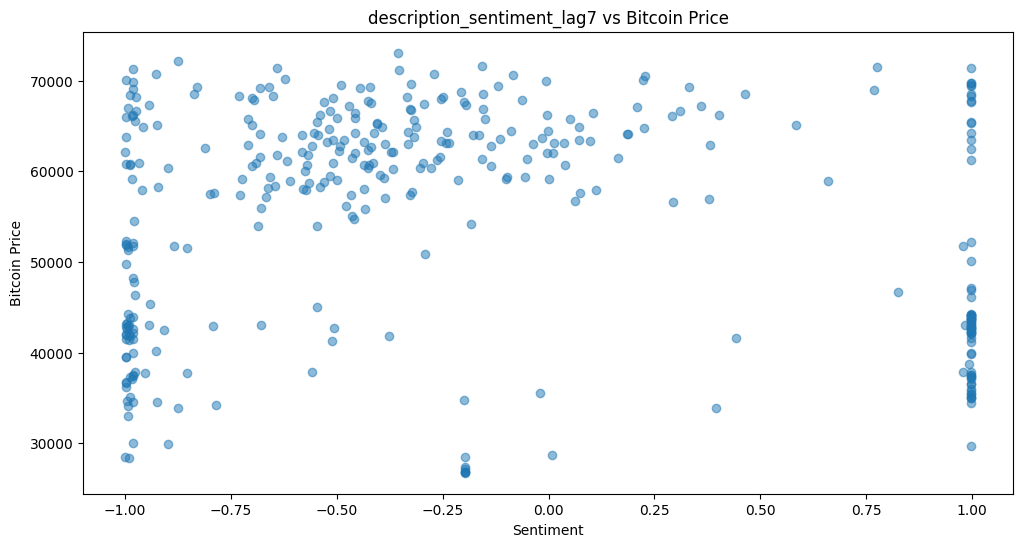

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(df['description_sentiment_lag7'], df['bitcoin_price'], alpha=0.5)
plt.title('description_sentiment_lag7 vs Bitcoin Price')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Price')

In [24]:
target_correlations = df.corr()['bitcoin_volatility'].sort_values(ascending=False)
print("Top 10 correlated features with bitcoin_volatility:")
print(target_correlations.head(10))


Top 10 correlated features with bitcoin_volatility:
bitcoin_volatility            1.000000
bitcoin_volume                0.339389
bitcoin_price                 0.146413
bitcoin_market_cap            0.144102
bitcoin_returns               0.083475
description_sentiment_lag4    0.063899
title_sentiment_lag4          0.062115
description_sentiment         0.058738
title_sentiment_lag2          0.057733
title_sentiment_lag3          0.057403
Name: bitcoin_volatility, dtype: float64


In [25]:
X = df.drop(['bitcoin_volatility'], axis=1)
y = df['bitcoin_volatility']

In [26]:
X.isnull().sum()

bitcoin_price                 0
bitcoin_volume                0
bitcoin_market_cap            0
bitcoin_returns               0
score                         0
No_Comments                   0
title_sentiment               0
description_sentiment         0
score_lag1                    0
score_lag2                    0
score_lag3                    0
score_lag4                    0
score_lag5                    0
score_lag6                    0
score_lag7                    0
No_Comments_lag1              0
No_Comments_lag2              0
No_Comments_lag3              0
No_Comments_lag4              0
No_Comments_lag5              0
No_Comments_lag6              0
No_Comments_lag7              0
title_sentiment_lag1          0
title_sentiment_lag2          0
title_sentiment_lag3          0
title_sentiment_lag4          0
title_sentiment_lag5          0
title_sentiment_lag6          0
title_sentiment_lag7          0
description_sentiment_lag1    0
description_sentiment_lag2    0
descript

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
mi_scores = mutual_info_regression(X_scaled, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)


In [29]:
print("\nTop 10 features by Mutual Information:")
print(mi_scores.head(10))



Top 10 features by Mutual Information:
bitcoin_market_cap            0.498762
bitcoin_price                 0.490881
score_lag7                    0.127634
No_Comments_lag7              0.116403
description_sentiment_lag4    0.109723
score_lag5                    0.108623
No_Comments_lag6              0.105032
No_Comments_lag5              0.100963
No_Comments_lag2              0.100220
title_sentiment_lag5          0.099488
Name: MI Scores, dtype: float64


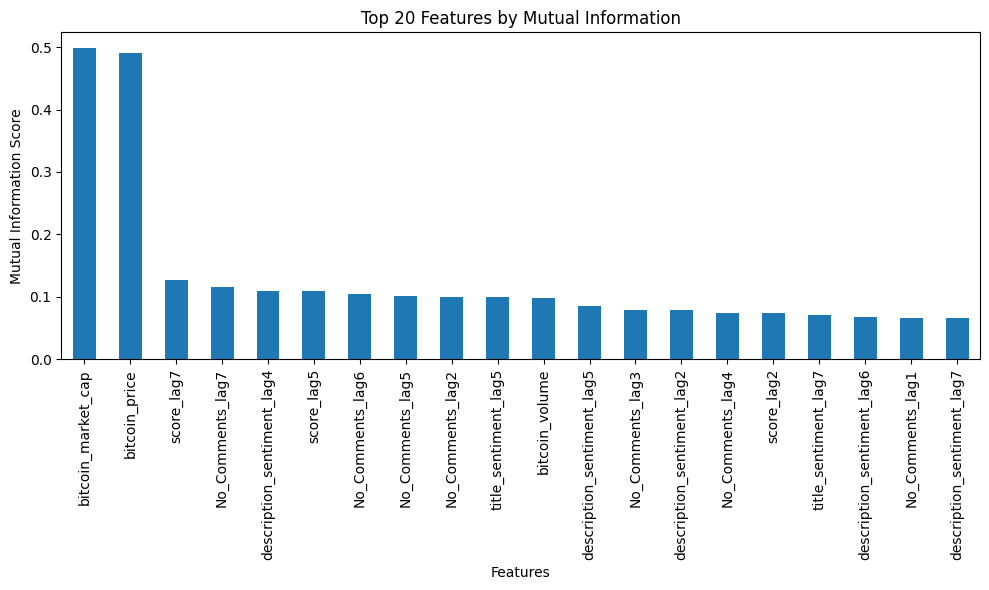

In [30]:
plt.figure(figsize=(10, 6))
mi_scores.head(20).plot(kind='bar')
plt.title('Top 20 Features by Mutual Information')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
for i in range(1,8):
    df[f"sentiment{i}"]=(df[f'title_sentiment_lag{i}']+df[f'description_sentiment_lag{i}'])/2

In [32]:
df['total_sentiment']=(df['sentiment']+df['sentiment1']+df['sentiment2']+df['sentiment3']+df["sentiment4"]+
                       df['sentiment5']+df['sentiment6']+df['sentiment7'])/8

    

Text(0, 0.5, 'Bitcoin Price')

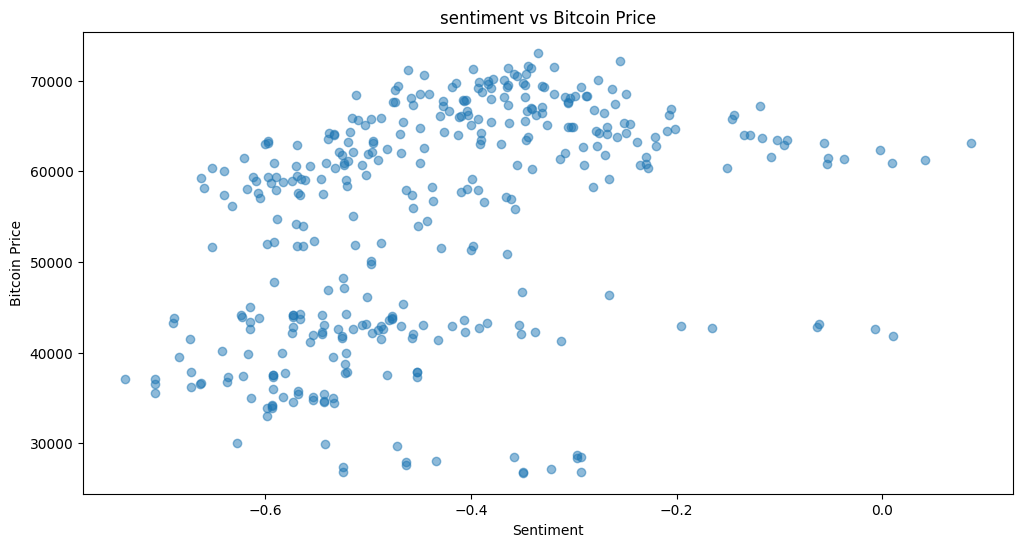

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(df['total_sentiment'], df['bitcoin_price'], alpha=0.5)
plt.title('sentiment vs Bitcoin Price')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin Price')

Text(0, 0.5, 'Bitcoin volatility')

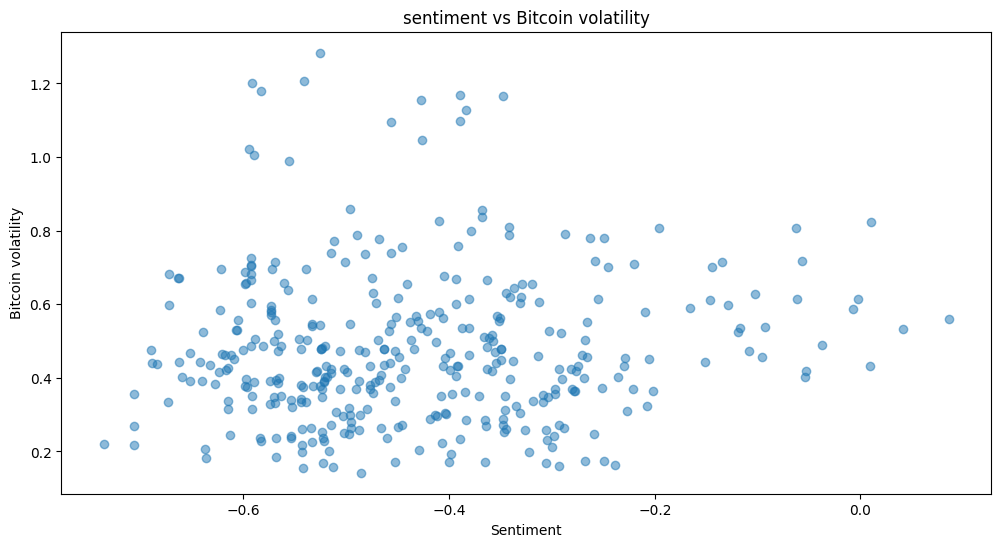

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(df['total_sentiment'], df['bitcoin_volatility'], alpha=0.5)
plt.title('sentiment vs Bitcoin volatility')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin volatility')

Text(0, 0.5, 'Bitcoin returns')

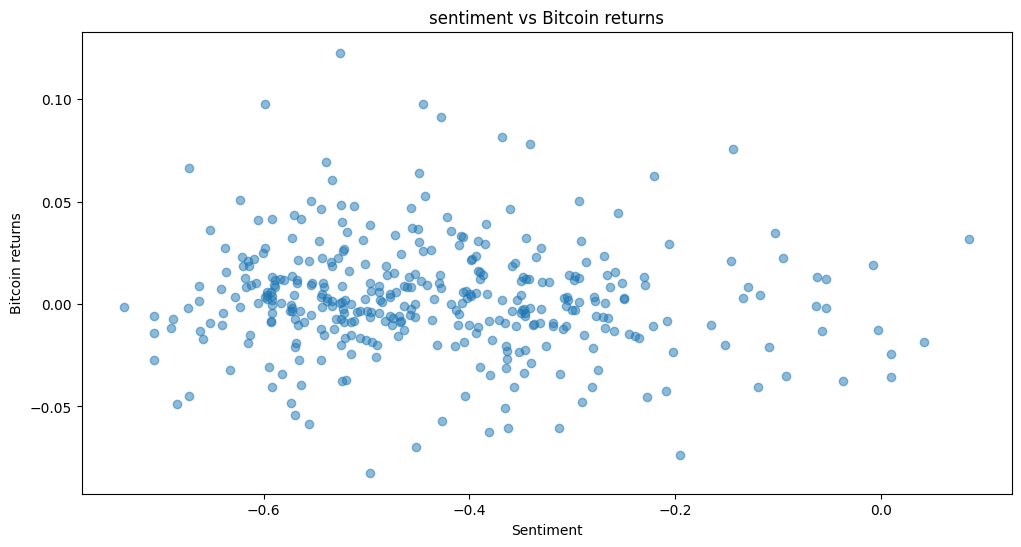

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(df['total_sentiment'], df['bitcoin_returns'], alpha=0.5)
plt.title('sentiment vs Bitcoin returns')
plt.xlabel('Sentiment')
plt.ylabel('Bitcoin returns')

In [36]:
df.to_csv('final -data.csv')